In [13]:
import pandas as pd

In [14]:
regression_df = pd.read_csv("clean_data/ELA and Math clean.csv")
regression_df = regression_df.astype({'ELA': int, 'Math': int})
regression_df

,RCDTS,County,Dist #,District Name/ School Name,City,ELA,Math
0,010010010260001,Adams,10,Seymour High School,Payson,524,489
1,010010020260001,Adams,20,Liberty High School,Liberty,500,485
2,010010030260001,Adams,30,Central High School,Camp Point,490,488
3,010010040260001,Adams,40,Unity High School,Mendon,505,485
4,010011720220003,Adams,1720,Quincy Sr High School,Quincy,489,473
...,...,...,...,...,...,...,...
705,56099207U260001,Will,207U,Peotone High School,Peotone,514,493
706,56099209U260001,Will,209U,Wilmington High School,Wilmington,482,460
707,56099255U260001,Will,255U,Reed-Custer High School,Braidwood,480,484
708,56099365U260007,Will,365U,Bolingbrook High School,Bolingbrook,490,490


In [15]:
general_df = pd.read_csv("clean_data/high_school_filtered.csv")
general_df

,RCDTS,Type,District,School Type,City,County,District Type,District Size,Student Enrollment - Total,Student Enrollment - Low Income %,...,Teacher Retention Rate,# of 12 graders who took advanced Courses,Avg Number of days of Physical Education Per Week Per Student,Community College Remediation %,Avg Class Size - High School,Chronic Absenteeism,Number of students who took AP Exams Grade 10,Number of students who passed AP Exams Grade 12,Chronic Absenteeism - Low Income,Low Income Count
0,010010010260001,School,Payson CUSD 1,HIGH SCHOOL,Payson,Adams,UNIT,MEDIUM,246.0,43.9,...,90.6,NaN,5.0,37.5,13.0,12.0,NaN,NaN,21.6,107.994
1,010010020260001,School,Liberty CUSD 2,HIGH SCHOOL,Liberty,Adams,UNIT,MEDIUM,281.0,22.4,...,84.8,23.0,3.0,20.0,22.0,2.5,NaN,NaN,7.8,62.944
2,010010030260001,School,Central CUSD 3,HIGH SCHOOL,Camp Point,Adams,UNIT,MEDIUM,245.0,42.0,...,83.7,15.0,5.0,32.3,15.0,11.9,NaN,NaN,19.6,102.900
3,010010040260001,School,CUSD 4,HIGH SCHOOL,Mendon,Adams,UNIT,MEDIUM,209.0,27.3,...,83.7,30.0,5.0,31.6,11.0,17.3,NaN,NaN,18.9,57.057
4,010011720220003,School,Quincy SD 172,HIGH SCHOOL,Quincy,Adams,UNIT,LARGE,1753.0,50.3,...,81.9,151.0,5.0,29.2,20.0,31.3,35.0,120.0,47.5,881.759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,56099207U260001,School,Peotone CUSD 207U,HIGH SCHOOL,Peotone,Will,UNIT,MEDIUM,493.0,19.3,...,75.5,54.0,4.0,42.6,16.0,8.0,NaN,52.0,14.0,95.149
649,56099209U260001,School,Wilmington CUSD 209U,HIGH SCHOOL,Wilmington,Will,UNIT,MEDIUM,465.0,36.6,...,89.4,72.0,3.0,61.8,19.0,14.4,NaN,NaN,21.0,170.190
650,56099255U260001,School,Reed Custer CUSD 255U,HIGH SCHOOL,Braidwood,Will,UNIT,MEDIUM,477.0,32.7,...,83.8,85.0,4.0,41.0,22.0,8.3,NaN,18.0,1.3,155.979
651,56099365U260007,School,Valley View CUSD 365U,HIGH SCHOOL,Bolingbrook,Will,UNIT,LARGE,3550.0,59.4,...,90.0,410.0,5.0,45.1,19.0,32.5,261.0,511.0,39.5,2108.700


In [16]:
gen_df = general_df.filter(['RCDTS', 'Student Enrollment - Low Income %', 'Avg Class Size – All Grades', 'Avg Teaching Exp',
                           'Bachelor Degree', 'Masters Degree', 'Teacher Retention Rate', 'Admin Avg Salary'], axis = 1)
gen_df = gen_df.dropna()
gen_df.rename(columns = {'Avg Class Size – All Grades':'ClassSize'}, inplace = True)
gen_df.rename(columns = {'Student Enrollment - Low Income %':'LowIncome'}, inplace = True)
gen_df.rename(columns = {'Teacher Retention Rate':'TeachRetRate'}, inplace = True)
gen_df

,RCDTS,LowIncome,ClassSize,TeachRetRate
0,010010010260001,43.9,16.0,90.6
1,010010020260001,22.4,20.0,84.8
2,010010030260001,42.0,15.0,83.7
3,010010040260001,27.3,11.0,83.7
4,010011720220003,50.3,20.0,81.9
...,...,...,...,...
648,56099207U260001,19.3,16.0,75.5
649,56099209U260001,36.6,19.0,89.4
650,56099255U260001,32.7,22.0,83.8
651,56099365U260007,59.4,19.0,90.0


In [17]:
df = pd.merge(regression_df, gen_df, on = "RCDTS", how = "inner")
df = df.dropna()
df =df.drop(columns = ['RCDTS', 'County ', 'Dist # ', 'District Name/ School Name', 'City'])
#df = df.astype(int)
df

,ELA,Math,LowIncome,ClassSize,TeachRetRate
0,524,489,43.9,16.0,90.6
1,500,485,22.4,20.0,84.8
2,490,488,42.0,15.0,83.7
3,505,485,27.3,11.0,83.7
4,489,473,50.3,20.0,81.9
...,...,...,...,...,...
625,514,493,19.3,16.0,75.5
626,482,460,36.6,19.0,89.4
627,480,484,32.7,22.0,83.8
628,490,490,59.4,19.0,90.0


In [18]:
X = df.drop(columns = ['ELA', 'Math'], axis = 1)
X.head(2)

,LowIncome,ClassSize,TeachRetRate
0,43.9,16.0,90.6
1,22.4,20.0,84.8


In [19]:
y = df['Math']

In [20]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [21]:
# splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [22]:
y_prediction =  LR.predict(x_test)
y_prediction


array([480.36214826, 512.99562916, 511.5870825 , 492.0829688 ,
       500.50528802, 511.85416877, 520.17814427, 482.76353766,
       547.79975042, 463.17357279, 540.57954051, 425.09707653,
       505.11709487, 526.62029977, 534.89250184, 479.39698313,
       508.22273519, 501.06260401, 455.90813758, 466.07275269,
       476.97669453, 480.09962487, 503.46028017, 455.44495585,
       445.85352126, 522.74162495, 446.76766596, 511.33028067,
       463.83575842, 502.55720207, 506.9706836 , 489.19896789,
       444.96226277, 440.98973357, 518.40167356, 442.14283643,
       457.10535843, 521.34193723, 545.46689344, 474.33690019,
       490.24288242, 479.89710664, 513.22078246, 495.65620574,
       555.83939446, 453.96541795, 445.7733912 , 486.96308049,
       452.88441321, 474.98920052, 510.99551117, 517.41264722,
       500.93205854, 545.83847937, 448.69568627, 505.12163511,
       442.8322779 , 500.45549983, 518.3249094 , 519.19129643,
       547.94859006, 555.88388897, 490.89041398, 476.18

r2 score is  0.5347658994508955
mean_sqrd_error is== 888.1297880430225
root_mean_squared error of is== 29.80150647271078


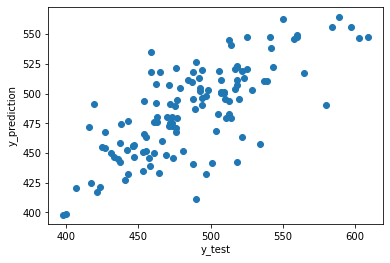

In [23]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# predicting the accuracy score
score = r2_score(y_test,y_prediction)
print('r2 score is ', score)
print('mean_sqrd_error is==', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==', np.sqrt(mean_squared_error(y_test,y_prediction)))

#scatter plot of test vs prediction
plt.scatter(y_test, y_prediction)
plt.xlabel('y_test')
plt.ylabel('y_prediction')
plt.show()

r2 score is  0.5786454008318098
mean_sqrd_error is== 549.4838988300984
root_mean_squared error of is== 23.44107290270858


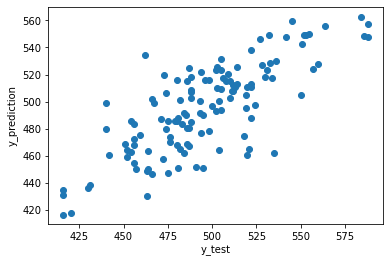

In [24]:
y = df['ELA']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# creating an object of LinearRegression class
LR = LinearRegression()

# fitting the training data
LR.fit(x_train,y_train)
y_prediction =  LR.predict(x_test)

# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np

# predicting the accuracy score
score = r2_score(y_test,y_prediction)
print('r2 score is ', score)
print('mean_sqrd_error is==', mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==', np.sqrt(mean_squared_error(y_test,y_prediction)))

#scatter plot of test vs prediction
plt.scatter(y_test, y_prediction)
plt.xlabel('y_test')
plt.ylabel('y_prediction')
plt.show()